# Eigenvectors From Eigenvalues Implementation

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
#create symmetric matrix
def create_symmetric_matrix(n):
    A = np.random.rand(n**2).reshape(n,n)
    A = A + A.T
    return A

In [3]:
A = create_symmetric_matrix(4)

In [4]:
n = A.shape[0]

In [5]:
eval_A, evec_A = np.linalg.eig(A)

In [6]:
# Numpy way of calculating eigenvector
def evec_from_numpy(A):
    _, evec_A = np.linalg.eig(A)
    return evec_A

In [7]:
# New way of calculating eigenvector
def evec_from_eval(A, eval_A):
    n = A.shape[0]
    evec_A = np.zeros((n, n))
    for k in range(n):
        M = np.delete(A, k, axis=0)
        M = np.delete(M, k, axis=1)

        eval_M = np.linalg.eigvals(M)

        # nominator of v11, v21, v31, v41
        nominator = [np.prod(eval_A[i] - eval_M) for i in range(n)]    
        
        # denominator of v11, v21, v31, v41        (λ0-λ0)(λ0-λ1)(λ0-λ2)(λ0-λ3)        
        # delete value=0 entry   (λ0-λ0) 
        denominator = [np.prod(np.delete(eval_A[i] - eval_A, i)) for i in range(n)]
        
        evec_A[k, :] = np.array(nominator) / np.array(denominator)
        
    return evec_A

In [8]:
evec_A_from_eval = np.zeros((n, n))

In [9]:
evec_A_from_eval = evec_from_eval(A, eval_A)

In [10]:
print(evec_A**2)

[[0.16794718 0.51232766 0.28795809 0.03176706]
 [0.29927202 0.00221649 0.04497606 0.65353543]
 [0.2638388  0.48038636 0.22206419 0.03371065]
 [0.26894199 0.00506948 0.44500166 0.28098687]]


In [11]:
# check equal
np.allclose(evec_A_from_eval, evec_A**2)

True

In [12]:
# estimate exec time, calcuate 100 times for each nxn matrix
def evaluate_execution_time_1(A):
    [evec_from_numpy(A) for i in range(100)]
    

In [13]:
def evaluate_execution_time_2(A):
     [evec_from_eval(A, eval_A) for i in range(100)]

In [14]:
time_numpy = []
time_efe = []

for i in range(50):
    A = create_symmetric_matrix(i)
    eval_A, evec_A = np.linalg.eig(A)
    
    start = time.perf_counter()
    evaluate_execution_time_1(A)
    end = time.perf_counter()
    ti = (end - start)
    time_numpy.append(ti)

    start = time.perf_counter()
    evaluate_execution_time_2(A)
    end = time.perf_counter()
    ti = (end - start)
    time_efe.append(ti)

arr_numpy = np.array(time_numpy)
arr_efe = np.array(time_efe)

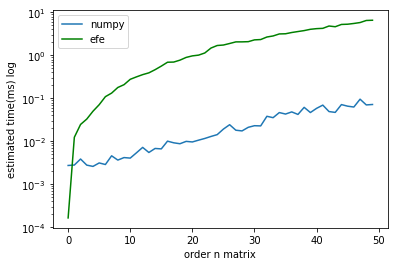

In [15]:
fig, ax = plt.subplots()

ax.set_xlabel("order n matrix")
ax.set_ylabel("estimated time(ms) log")

arr_x = [i for i in range(50)]
ax.plot(arr_x, arr_numpy, label='numpy')
ax.plot(arr_x, arr_efe,color='green', label='efe')

ax.legend()
plt.yscale("log")